In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.1 MB/s eta 0:00:00


In [ ]:
# Import required libraries
import json
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import os

# Download required NLTK data (run once)
try:
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
except Exception as e:
    print(f"❌ Error downloading NLTK data: {str(e)}")
    raise

# Initialize tools
stop_words = set(stopwords.words('english')) - {'love', 'hate', 'good', 'bad'}  # Keep sentiment words
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
analyzer = SentimentIntensityAnalyzer()

# 1. Load Corpus
def load_corpus(filename="/content/youtube_all_comments.json"):
    if not os.path.exists(filename):
        raise FileNotFoundError(f"The file '{filename}' does not exist. Please upload it to Colab's /content directory.")
    try:
        with open(filename, 'r', encoding='utf-8') as f:
            data = json.load(f)
        comments = [comment["text"] for comment in data if "text" in comment and isinstance(comment["text"], str) and comment["text"].strip()]
        if not comments:
            raise ValueError("No valid non-empty comments with 'text' field found in the JSON file.")
        print(f"Loaded {len(comments)} comments from '{filename}'")
        # Print sample comments for debugging
        print("Sample comments (first 5):")
        for i, comment in enumerate(comments[:5]):
            print(f"Comment {i+1}: {comment[:100]}...")
        return comments
    except Exception as e:
        raise Exception(f"Error loading JSON file: {str(e)}")

# 2. Text Cleaning
def clean_text(text):
    text = text.lower()  # Lowercasing
    # Retain emojis and special characters (optional: comment out to remove)
    # text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    # text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    # Only remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    return text.strip()

# 3. Preprocessing
def preprocess_text(text):
    try:
        tokens = word_tokenize(text)  # Tokenization
        tokens = [token for token in tokens if token not in stop_words]  # Stopword removal
        lemmatized = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatization (skip stemming)
        return ' '.join(lemmatized) if lemmatized else text  # Fallback to cleaned text if empty
    except Exception as e:
        print(f"Error preprocessing text: {str(e)}")
        return text  # Fallback to cleaned text

# 4. Sentiment Analysis
def analyze_sentiment(text):
    try:
        score = analyzer.polarity_scores(text)
        if score['compound'] >= 0.05:
            sentiment = "Positive"
        elif score['compound'] <= -0.05:
            sentiment = "Negative"
        else:
            sentiment = "Neutral"
        return sentiment, score['compound']
    except Exception as e:
        print(f"Error analyzing sentiment: {str(e)}")
        return "Neutral", 0.0

# Main Pipeline
def sentiment_pipeline():
    try:
        # Load corpus
        corpus = load_corpus()
        results = []

        for i, text in enumerate(corpus):
            # Preprocess text
            cleaned_text = clean_text(text)
            processed_text = preprocess_text(cleaned_text)

            # Perform sentiment analysis
            sentiment_label, sentiment_score = analyze_sentiment(processed_text)

            # Store results
            results.append({
                "original_text": text,
                "cleaned_text": cleaned_text,
                "processed_text": processed_text,
                "sentiment": sentiment_label,
                "sentiment_score": sentiment_score
            })

            # Debugging: Print intermediate outputs for first 5 comments
            if i < 5:
                print(f"\nComment {i+1}:")
                print(f"Original: {text[:100]}...")
                print(f"Cleaned: {cleaned_text[:100]}...")
                print(f"Processed: {processed_text[:100]}...")
                print(f"Sentiment: {sentiment_label}, Score: {sentiment_score:.4f}")

            if (i + 1) % 10000 == 0:  # Progress feedback
                print(f"Processed {i + 1} comments...")

        # Save results
        output_file = "/content/sentiment_results.json"
        try:
            with open(output_file, "w", encoding="utf-8") as f:
                json.dump(results, f, ensure_ascii=False, indent=4)
            if os.path.exists(output_file):
                print(f"✅ Sentiment analysis completed. Results saved to '{output_file}'. Total comments processed: {len(results)}")
                print("Directory contents:", os.listdir("/content"))
            else:
                print(f"❌ File '{output_file}' was not created. Check write permissions or disk space.")
        except Exception as e:
            print(f"❌ Error saving JSON file: {str(e)}")
            print("Ensure you have write permissions in /content and enough disk space.")

    except Exception as e:
        print(f"❌ Error in sentiment pipeline: {str(e)}")

if __name__ == "__main__":
    sentiment_pipeline()

Streaming output truncated to the last 5000 lines.
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

Error preprocessing text: 
**********************************************************************
  Resource punkt_tab not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt_tab')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt_tab/english/

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

Error preprocessing text: 
********************************

In [ ]:
# Import required libraries
import json
from collections import Counter
import os

# Load sentiment results
def load_sentiment_results(filename="/content/sentiment_results.json"):
    if not os.path.exists(filename):
        raise FileNotFoundError(f"The file '{filename}' does not exist. Please ensure it was generated in Colab's /content directory.")
    try:
        with open(filename, 'r', encoding='utf-8') as f:
            data = json.load(f)
        if not data:
            raise ValueError("The file 'sentiment_results.json' is empty.")
        return data
    except json.JSONDecodeError:
        raise json.JSONDecodeError("The file 'sentiment_results.json' is corrupted or invalid. Please regenerate it.")
    except Exception as e:
        raise Exception(f"Error loading JSON file: {str(e)}")

# Analyze sentiment distribution and statistics
def analyze_sentiment(data):
    try:
        sentiments = [item["sentiment"] for item in data if "sentiment" in item]
        scores = [item["sentiment_score"] for item in data if "sentiment_score" in item]

        # Check if data is valid
        if not sentiments or not scores:
            raise ValueError("No valid 'sentiment' or 'sentiment_score' fields found in the data.")

        # Sentiment distribution
        sentiment_counts = Counter(sentiments)
        total_comments = len(sentiments)

        print(f"Total comments analyzed: {total_comments}")
        print("\nSentiment Distribution:")
        for sentiment in ["Positive", "Negative", "Neutral"]:  # Ensure all categories are shown
            count = sentiment_counts.get(sentiment, 0)
            percentage = (count / total_comments) * 100 if total_comments > 0 else 0
            print(f"{sentiment}: {count} ({percentage:.2f}%)")

        # Average sentiment score
        avg_score = sum(scores) / len(scores) if scores else 0
        print(f"\nAverage Sentiment Score: {avg_score:.4f} (range: -1 to 1)")

        # Score statistics by sentiment
        positive_scores = [s for s, sent in zip(scores, sentiments) if sent == "Positive"]
        negative_scores = [s for s, sent in zip(scores, sentiments) if sent == "Negative"]
        neutral_scores = [s for s, sent in zip(scores, sentiments) if sent == "Neutral"]

        print("\nScore Statistics:")
        print(f"Positive Average Score: {(sum(positive_scores) / len(positive_scores) if positive_scores else 0):.4f} ({len(positive_scores)} comments)")
        print(f"Negative Average Score: {(sum(negative_scores) / len(negative_scores) if negative_scores else 0):.4f} ({len(negative_scores)} comments)")
        print(f"Neutral Average Score: {(sum(neutral_scores) / len(neutral_scores) if neutral_scores else 0):.4f} ({len(neutral_scores)} comments)")

    except Exception as e:
        print(f"❌ Error analyzing sentiment data: {str(e)}")

# Main function
def main():
    try:
        data = load_sentiment_results()
        print("Directory contents:", os.listdir("/content"))
        analyze_sentiment(data)
    except FileNotFoundError as e:
        print(f"❌ {str(e)}")
    except json.JSONDecodeError as e:
        print(f"❌ {str(e)}")
    except Exception as e:
        print(f"❌ An error occurred: {str(e)}")

if __name__ == "__main__":
    main()

Directory contents: ['.config', 'sentiment_results.json', 'youtube_all_comments.json', '.ipynb_checkpoints', 'sample_data']
Total comments analyzed: 167407

Sentiment Distribution:
Positive: 95486 (57.04%)
Negative: 13301 (7.95%)
Neutral: 58620 (35.02%)

Average Sentiment Score: 0.3629 (range: -1 to 1)

Score Statistics:
Positive Average Score: 0.7061 (95486 comments)
Negative Average Score: -0.5009 (13301 comments)
Neutral Average Score: 0.0000 (58620 comments)


Directory contents: ['.config', 'sentiment_results.json', 'youtube_all_comments.json', '.ipynb_checkpoints', 'sample_data']
Debug: lengths - labels: 3, values: 3, percentages: 3, scores: 3
Pie chart saved as 'sentiment_pie_chart.png' in /content


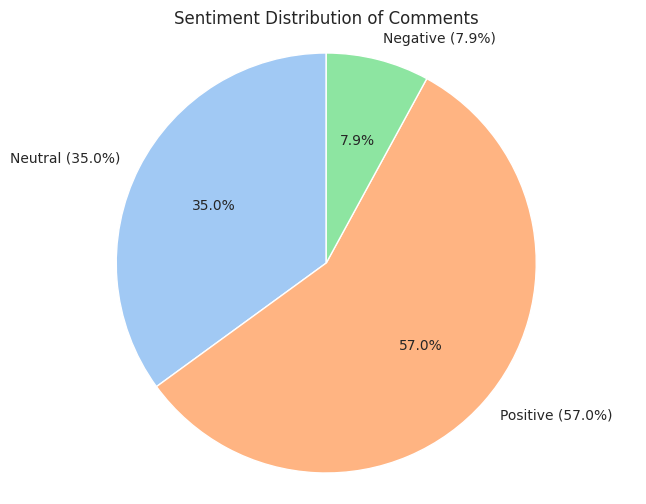

Bar plot saved as 'sentiment_bar_plot.png' in /content


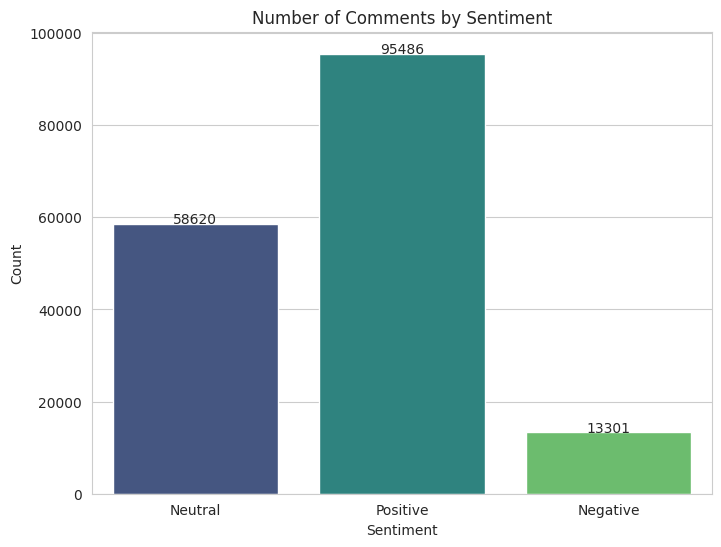

❌ An error occurred: Error creating visualizations: All arrays must be of the same length


<Figure size 800x600 with 0 Axes>

In [ ]:
# Import required libraries
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os

# Load sentiment results
def load_sentiment_results(filename="/content/sentiment_results.json"):
    if not os.path.exists(filename):
        raise FileNotFoundError(f"The file '{filename}' does not exist. Please ensure it was generated in Colab's /content directory.")
    try:
        with open(filename, 'r', encoding='utf-8') as f:
            data = json.load(f)
        if not data:
            raise ValueError("The file 'sentiment_results.json' is empty.")
        return data
    except json.JSONDecodeError:
        raise json.JSONDecodeError("The file 'sentiment_results.json' is corrupted or invalid. Please regenerate it.")
    except Exception as e:
        raise Exception(f"Error loading JSON file: {str(e)}")

# Prepare data for visualization
def prepare_data(data):
    try:
        sentiments = [item["sentiment"] for item in data if "sentiment" in item]
        scores = [item["sentiment_score"] for item in data if "sentiment_score" in item]

        if not sentiments or not scores:
            raise ValueError("No valid 'sentiment' or 'sentiment_score' fields found in the data.")

        # Sentiment distribution
        sentiment_counts = Counter(sentiments)
        labels = list(sentiment_counts.keys())
        values = list(sentiment_counts.values())
        percentages = [v / sum(values) * 100 for v in values] if values else [0, 0, 0]

        # Align scores with sentiment categories (aggregate scores per sentiment)
        sentiment_scores = {"Positive": [], "Negative": [], "Neutral": []}
        for sent, score in zip(sentiments, scores):
            if sent in sentiment_scores:
                sentiment_scores[sent].append(score)
        aligned_scores = [sentiment_scores.get(label, [0]) for label in labels]

        print(f"Debug: lengths - labels: {len(labels)}, values: {len(values)}, percentages: {len(percentages)}, scores: {len(aligned_scores)}")
        return labels, values, percentages, aligned_scores
    except Exception as e:
        raise Exception(f"Error preparing data: {str(e)}")

# Create visualizations and save them
def visualize_sentiment(labels, values, percentages, scores):
    try:
        # Set style for better visuals
        sns.set_style("whitegrid")

        # 1. Pie Chart for Sentiment Distribution
        plt.figure(figsize=(8, 6))
        plt.pie(values, labels=[f"{l} ({p:.1f}%)" for l, p in zip(labels, percentages)], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
        plt.title("Sentiment Distribution of Comments")
        plt.axis('equal')
        plt.savefig("/content/sentiment_pie_chart.png", dpi=300, bbox_inches='tight')
        print("Pie chart saved as 'sentiment_pie_chart.png' in /content")
        plt.show()

        # 2. Bar Plot for Sentiment Counts
        plt.figure(figsize=(8, 6))
        sns.barplot(x=labels, y=values, hue=labels, palette="viridis", legend=False)
        plt.title("Number of Comments by Sentiment")
        plt.xlabel("Sentiment")
        plt.ylabel("Count")
        for i, v in enumerate(values):
            plt.text(i, v + 10, str(v), ha='center')
        plt.savefig("/content/sentiment_bar_plot.png", dpi=300, bbox_inches='tight')
        print("Bar plot saved as 'sentiment_bar_plot.png' in /content")
        plt.show()

        # 3. Box Plot for Sentiment Scores
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=labels, y=[score for sublist in scores for score in sublist], palette="muted")
        plt.title("Distribution of Sentiment Scores")
        plt.xlabel("Sentiment")
        plt.ylabel("Sentiment Score")
        plt.show()

        print("Visualizations displayed inline.")
    except Exception as e:
        raise Exception(f"Error creating visualizations: {str(e)}")

# Main function
def main():
    try:
        data = load_sentiment_results()
        print("Directory contents:", os.listdir("/content"))
        labels, values, percentages, scores = prepare_data(data)
        visualize_sentiment(labels, values, percentages, scores)
    except FileNotFoundError as e:
        print(f"❌ {str(e)}")
    except json.JSONDecodeError as e:
        print(f"❌ {str(e)}")
    except Exception as e:
        print(f"❌ An error occurred: {str(e)}")

if __name__ == "__main__":
    main()